In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

In [3]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [4]:
import scikitplot as skplt

In [5]:
obesity_data = pd.read_csv("dataset.csv")

In [6]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
obesity_data.shape

(2111, 17)

Data Analysis

In [8]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Exploring Features

In [9]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

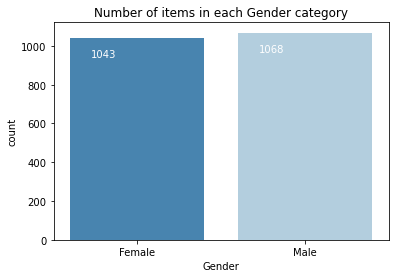

In [10]:
count_values(obesity_data, "Gender")

In [11]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [12]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [13]:
obesity_data["Age"].median()

22.77789

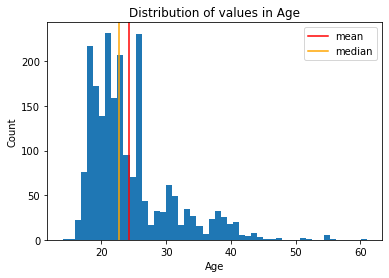

In [14]:
plot_distribution(obesity_data, "Age")

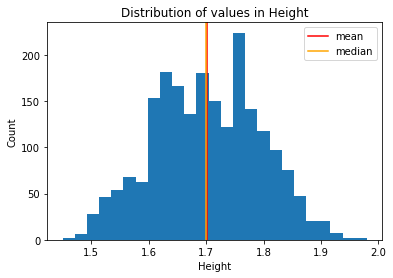

In [15]:
plot_distribution(obesity_data, "Height")

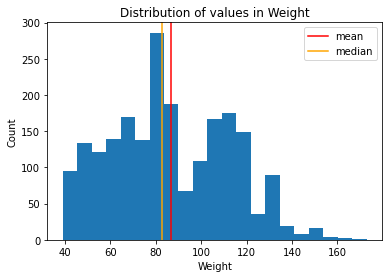

In [16]:
plot_distribution(obesity_data, "Weight")

Body Mass Index

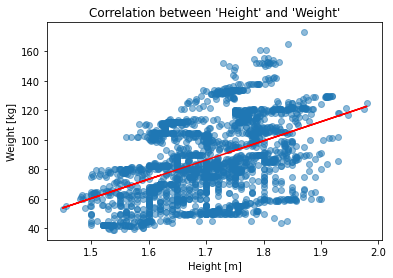

In [17]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

Food between meals

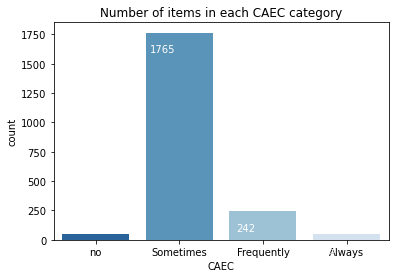

In [18]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

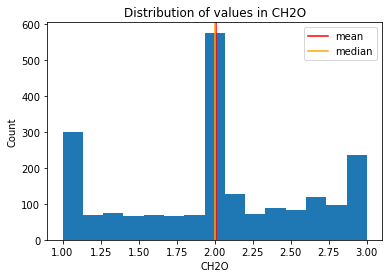

In [19]:
plot_distribution(obesity_data, "CH2O")

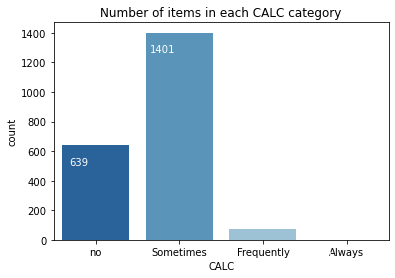

In [20]:
count_values(obesity_data, "CALC")

Normal, Overweight or Obese?
People, according to their Body mass index (BMI), are categorised as:

Underweight if BMI < 18.5
Normal if BMI 18.5 - 24.9
Overweight if BMI 25.0 - 29.9
Obesity I if BMI 30.0 - 34.9
Obesity II if BMI 35.0 to 39.9
Obesity III if BMI > 40

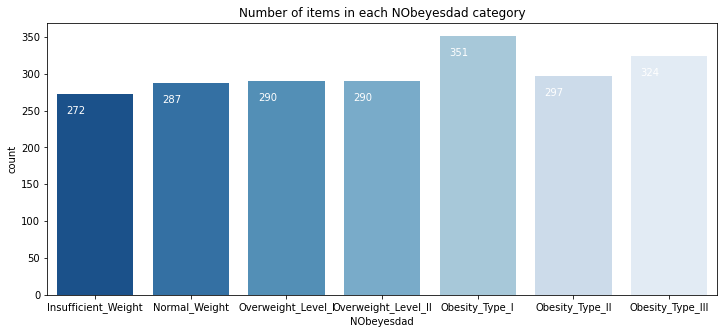

In [21]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [22]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

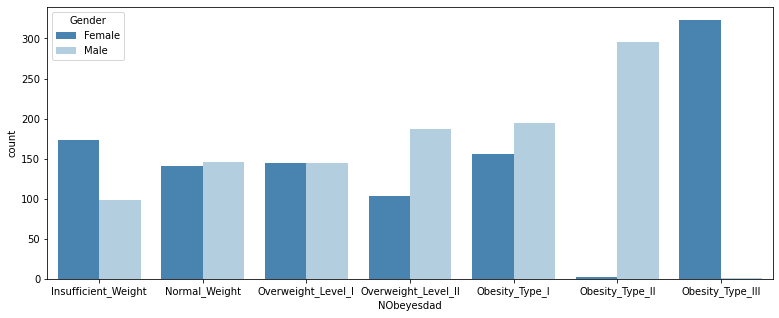

In [23]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

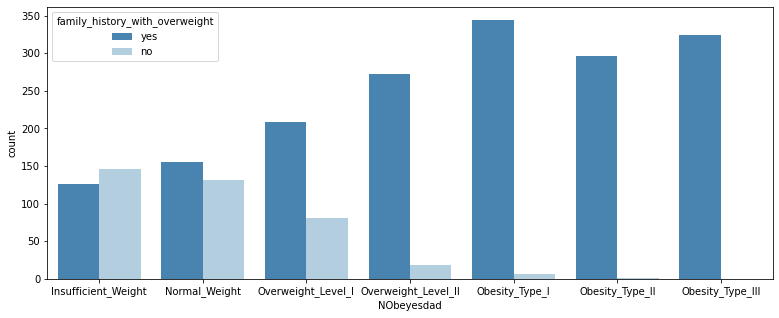

In [24]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Exploring Stastics

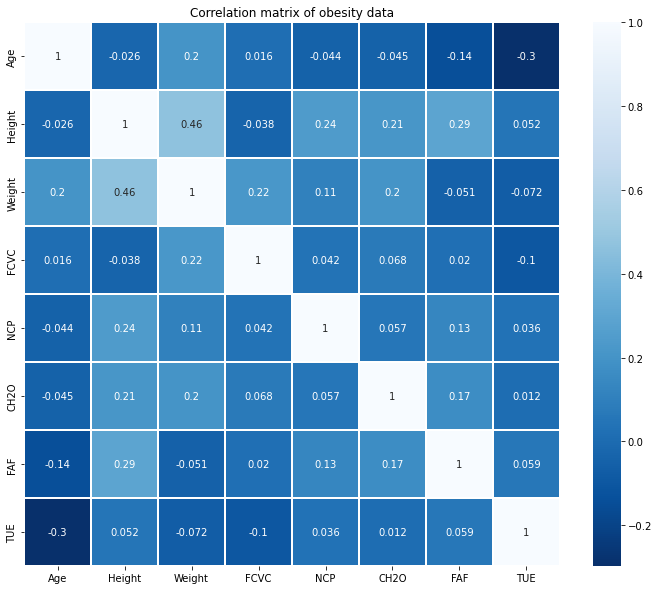

In [25]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [26]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Data Preprocessing

In [27]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [28]:
obesity_lab = obesity_data[["NObeyesdad"]]

In [29]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [30]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [31]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


Seperating features and labels

In [32]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [33]:
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

Converting numericals-A brief check shows that some columns hold "float64" numbers, and another - "uint8" values. Machine Learning algorithms work best with floating point numbers. For this reason, all values are converted into floats.

In [34]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [35]:
obesity_features = obesity_features.astype("float")

In [36]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

Scaleing the Features-Obesity features are scaled with MinMaxScaler() which makes all values between 0 and 1. The second row confirms the scaling was successful.

In [37]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [38]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

Encode the Labels-Most Machine Learning classification algorithms expect labels with numeric values (and not strings).

In [39]:
encoder = LabelEncoder()

In [40]:
encoder.fit(obesity_label)

LabelEncoder()

In [41]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [42]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [43]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

Train and Test Split-The dataset is split into training and testing sets. A validation set was not withheld since the dataset is small and sufficient number of samples should be kept for training. Cross validation during Grid Search addresses this drawback.

Splitting function (train_test_split) shuffles the data and reserves 20% for testing. Datasets' shape after splitting is checked below.

In [44]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42)

In [45]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

Counter tells how many examples are placed in each class. The outputs below show that there are sufficient number of samples both in training and testing set.

In [46]:
Counter(obesity_labels_tr)

Counter({5: 232, 1: 229, 6: 232, 0: 218, 3: 237, 4: 259, 2: 281})

In [47]:
Counter(obesity_labels_ts)

Counter({0: 54, 1: 58, 6: 58, 4: 65, 3: 60, 2: 70, 5: 58})

Build Model

In [48]:
f1 = make_scorer(f1_score, average = "weighted")

In [49]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}

In [50]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)

In [51]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

Cross-validation shows that almost all combinations reach "f1 score" close to or above 90%.

In [52]:
grid_search.cv_results_

{'mean_fit_time': array([0.00838981, 0.00913243, 0.00979557, 0.01020823, 0.01033878,
        0.00981164]),
 'std_fit_time': array([0.00145891, 0.00115414, 0.0006647 , 0.00121623, 0.00135247,
        0.00061611]),
 'mean_score_time': array([0.00296774, 0.00287266, 0.00284996, 0.00275483, 0.00292282,
        0.0030293 ]),
 'std_score_time': array([0.00026727, 0.00015047, 0.00037627, 0.00013266, 0.00024157,
        0.00087249]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.7683154 , 0.87279859, 0.92248251, 0.90775663, 0.88959043,
        0.91633067]),
 'split1_test_score': array([0.82389405, 0.91248632, 0.93494761, 0.9321969 , 0.92941096,
        0.94109183]),
 'split2_test_score': array([0.8430409

In [53]:
grid_search.best_params_

{'max_depth': 15}

Train and Evaluate the Model

In [54]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [55]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):

    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

Both "accuracy" and "f1 score" on the training data are 100% but on the testing one is 91%-92%. 

In [56]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9148936170212766
F1 on Test data: 0.9152724912457364


Decision trees are easier to interpret. If plotted (see below), they show how decisions were taken 

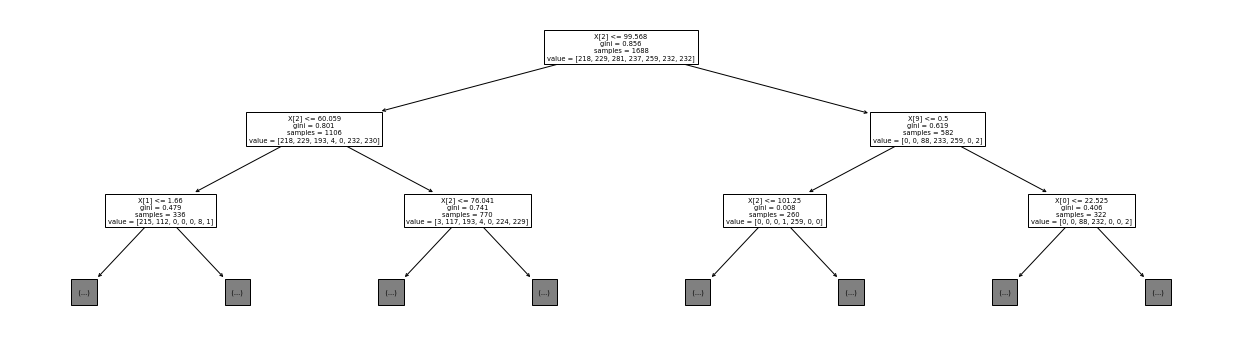

In [57]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

classification_report is a scikit learn function which shows classification success (metrics) for each class. For example, most of the samples in "Obesity_Type_III" (class 4) were properly classified. The model reached 100% "precision" and 99% "f1 score".

In [58]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.80      0.84      0.82        58
           2       0.91      0.96      0.93        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.86      0.86      0.86        58
           6       0.91      0.91      0.91        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



In [59]:
model_tree.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [60]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

confusion_matrix shows actual vs predicted labels. Rows represent actual classes, while columns represent predicted classes.

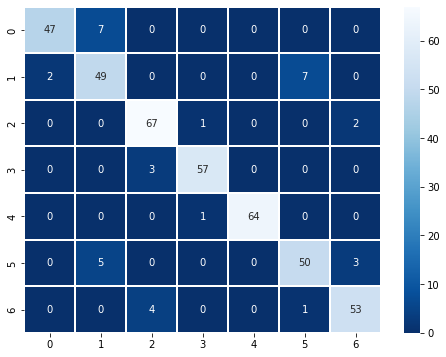

In [61]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

ROC Score and Curve-It is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate. Area Under the Curve (AUC) represents the probability that a random positive example is positioned to the right of a random negative example.

In [62]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)


In [63]:
obesity_score_probability

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [64]:
roc_auc_score(obesity_labels_ts, obesity_score_probability, multi_class = "ovr")

0.948826099443833

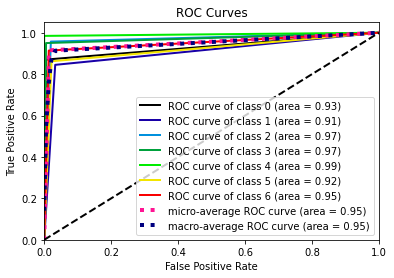

In [65]:
skplt.metrics.plot_roc(obesity_labels_ts, obesity_score_probability)
plt.show()

Clustering-An experiment was made to use dataset's features clustering. Forming separate clusters would indicate that values for the given features are specific for particular overweight/obesity type. The task is performed with "KMeans" - the simplest clustering algorithm.

In [66]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

DecisionTreeClassifier() found that the second ("Height") and the third ("Weight") columns are the most important ones. They bear 21.9% and 47.85%, respectively, of the information in the data. 

In [67]:
model_tree.feature_importances_

array([0.04184926, 0.22082785, 0.47515547, 0.0135702 , 0.00714488,
       0.00561014, 0.00081335, 0.01124707, 0.00060059, 0.15732823,
       0.0006524 , 0.00232294, 0.02176254, 0.00069194, 0.00134318,
       0.00157633, 0.00760256, 0.        , 0.        , 0.00135428,
       0.        , 0.        , 0.        , 0.        , 0.00062654,
       0.02540261, 0.00251765, 0.        , 0.        , 0.        ,
       0.        ])

In [68]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):

    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()

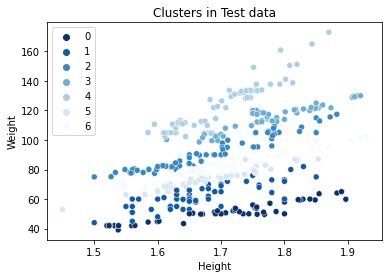

In [69]:
plot_clusters(obesity_features_ts, "Height", "Weight", obesity_labels_ts, "Clusters in Test data")

In [70]:
predicted_labels = kmeans.fit_predict(obesity_features_ts)


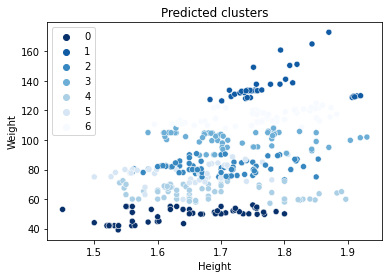

In [71]:
plot_clusters(obesity_features_ts, "Height", "Weight", predicted_labels, "Predicted clusters")

Conclusion-A person's height and weight are the most important factors determining his/her obesity status. Other factors might also play a role, e.g., eating habits and physical activity.

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [76]:
age = float(input("Enter your age: "))
height = float(input("Enter your height in meters: "))
weight = float(input("Enter your weight in kilograms: "))
gender = input("Enter your gender (Male/Female): ")
family_history = input("Do you have a family history of overweight? (Yes/No): ")

gender_numeric = 1 if gender.lower() == "male" else 0

family_history_numeric = 1 if family_history.lower() == "yes" else 0

user_data = {
    "Age": age,
    "Height": height,
    "Weight": weight,
    "Gender_Male": gender_numeric,
    "Gender_Female": 1 - gender_numeric,  # Complement of Gender_Male
    "family_history_with_overweight_yes": family_history_numeric,
    "family_history_with_overweight_no": 1 - family_history_numeric  # Complement of family_history_yes
}

user_df = pd.DataFrame([user_data])

user_df_encoded = pd.get_dummies(user_df)

missing_columns = set(obesity_features.columns) - set(user_df_encoded.columns)
for column in missing_columns:
    user_df_encoded[column] = 0

user_df_encoded = user_df_encoded[obesity_features.columns]

predicted_obesity_label = encoder.classes_[model_tree.predict(user_df_encoded)[0]]

print("Predicted Obesity Level: ", predicted_obesity_label)

Enter your age: 12
Enter your height in meters: 2.5
Enter your weight in kilograms: 100
Enter your gender (Male/Female): female
Do you have a family history of overweight? (Yes/No): yes
Predicted Obesity Level:  Obesity_Type_II


In [3]:
import spacy

In [4]:
nlp=spacy.load("en_core_web_sm")
doc=nlp("I love to eat biryani.She loves choco etc..but my bro loves cola")